# Cosine Similarity with Risk Factors Included

In [33]:
import numpy as np
import pandas as pd
import pickle
import h5py
import matplotlib.pyplot as plt

In [2]:
# Import the Cosine Scores
with open('../Step2-Signal/6-link_dict.pickle', 'rb') as f:
    parsed = pickle.load(f)

In [3]:
# Flatten into a single df
df = pd.concat(parsed, axis=0).reset_index()
df.head()

,level_0,level_1,accessionNumber,filingDate,reportDate,acceptanceDateTime,act,form,fileNumber,filmNumber,...,isXBRL,isInlineXBRL,primaryDocument,primaryDocDescription,Link,Loc7,Loc8,Item1a,Item7,Cos_Sim
0,0000006201,49,0000006201-21-000014,2021-02-17,2020-12-31,2021-02-17T17:17:57.000Z,34,10-K,001-08400,21646186,...,1.0,1.0,aal-20201231.htm,10-K 2020 02.17.21,https://www.sec.gov/Archives/edgar/data/6201/0...,"[[(158292, 158310), Item 7. Management], [(167...","[[(502641, 502662), ITEM 8A. CONSOLIDATED]]",ITEM 1A. RISK FACTORS Below are certain risk f...,ITEM 7. MANAGEMENT’S DISCUSSION AND ANALYSIS ...,0.955566
1,0000006201,150,0000006201-20-000023,2020-02-19,2019-12-31,2020-02-19T07:31:30.000Z,34,10-K,001-08400,20627428,...,1.0,1.0,a10k123119.htm,10-K 2019 02.19.20,https://www.sec.gov/Archives/edgar/data/6201/0...,"[[(153128, 153146), Item 7. Management], [(156...","[[(414897, 414918), ITEM 8A. CONSOLIDATED]]",ITEM 1A. RISK FACTORS Below are certain risk f...,ITEM 7. MANAGEMENT’S DISCUSSION AND ANALYSIS ...,0.727067
2,0000006201,225,0000006201-19-000009,2019-02-25,2018-12-31,2019-02-25T07:31:34.000Z,34,10-K,001-08400,19628071,...,1.0,0.0,a10k123118.htm,10-K 2018 02.25.19,https://www.sec.gov/Archives/edgar/data/6201/0...,"[[(9505, 9523), Item 7. Management], [(12796, ...","[[(300867, 300888), ITEM 8A. CONSOLIDATED]]",,ITEM 7. MANAGEMENT’S DISCUSSION AND ANALYSIS ...,0.969910
3,0000006201,315,0000006201-18-000009,2018-02-21,2017-12-31,2018-02-21T08:02:40.000Z,34,10-K,001-08400,18627088,...,1.0,0.0,a10k123117.htm,10-K,https://www.sec.gov/Archives/edgar/data/6201/0...,"[[(9554, 9572), Item 7. Management], [(13606, ...","[[(293380, 293401), ITEM 8A. CONSOLIDATED]]",,ITEM 7. MANAGEMENT’S DISCUSSION AND ANALYSIS ...,0.866968
4,0000006201,412,0001193125-17-051216,2017-02-22,2016-12-31,2017-02-22T08:01:43.000Z,34,10-K,001-08400,17627073,...,1.0,0.0,d286458d10k.htm,FORM 10-K,https://www.sec.gov/Archives/edgar/data/6201/0...,"[[(9935, 9953), Item 7. Management], [(14047, ...","[[(297249, 297270), ITEM 8A. CONSOLIDATED]]",ITEM 1A. RISKFACTORS Below are certain risk f...,ITEM 7. MANAGEMENT’S DISCUSSION AND ANALYSIS ...,0.842400


In [4]:
df.columns = ['company', 'doc_idx'] + list(df.columns[2:])
df.head()

,company,doc_idx,accessionNumber,filingDate,reportDate,acceptanceDateTime,act,form,fileNumber,filmNumber,...,isXBRL,isInlineXBRL,primaryDocument,primaryDocDescription,Link,Loc7,Loc8,Item1a,Item7,Cos_Sim
0,0000006201,49,0000006201-21-000014,2021-02-17,2020-12-31,2021-02-17T17:17:57.000Z,34,10-K,001-08400,21646186,...,1.0,1.0,aal-20201231.htm,10-K 2020 02.17.21,https://www.sec.gov/Archives/edgar/data/6201/0...,"[[(158292, 158310), Item 7. Management], [(167...","[[(502641, 502662), ITEM 8A. CONSOLIDATED]]",ITEM 1A. RISK FACTORS Below are certain risk f...,ITEM 7. MANAGEMENT’S DISCUSSION AND ANALYSIS ...,0.955566
1,0000006201,150,0000006201-20-000023,2020-02-19,2019-12-31,2020-02-19T07:31:30.000Z,34,10-K,001-08400,20627428,...,1.0,1.0,a10k123119.htm,10-K 2019 02.19.20,https://www.sec.gov/Archives/edgar/data/6201/0...,"[[(153128, 153146), Item 7. Management], [(156...","[[(414897, 414918), ITEM 8A. CONSOLIDATED]]",ITEM 1A. RISK FACTORS Below are certain risk f...,ITEM 7. MANAGEMENT’S DISCUSSION AND ANALYSIS ...,0.727067
2,0000006201,225,0000006201-19-000009,2019-02-25,2018-12-31,2019-02-25T07:31:34.000Z,34,10-K,001-08400,19628071,...,1.0,0.0,a10k123118.htm,10-K 2018 02.25.19,https://www.sec.gov/Archives/edgar/data/6201/0...,"[[(9505, 9523), Item 7. Management], [(12796, ...","[[(300867, 300888), ITEM 8A. CONSOLIDATED]]",,ITEM 7. MANAGEMENT’S DISCUSSION AND ANALYSIS ...,0.969910
3,0000006201,315,0000006201-18-000009,2018-02-21,2017-12-31,2018-02-21T08:02:40.000Z,34,10-K,001-08400,18627088,...,1.0,0.0,a10k123117.htm,10-K,https://www.sec.gov/Archives/edgar/data/6201/0...,"[[(9554, 9572), Item 7. Management], [(13606, ...","[[(293380, 293401), ITEM 8A. CONSOLIDATED]]",,ITEM 7. MANAGEMENT’S DISCUSSION AND ANALYSIS ...,0.866968
4,0000006201,412,0001193125-17-051216,2017-02-22,2016-12-31,2017-02-22T08:01:43.000Z,34,10-K,001-08400,17627073,...,1.0,0.0,d286458d10k.htm,FORM 10-K,https://www.sec.gov/Archives/edgar/data/6201/0...,"[[(9935, 9953), Item 7. Management], [(14047, ...","[[(297249, 297270), ITEM 8A. CONSOLIDATED]]",ITEM 1A. RISKFACTORS Below are certain risk f...,ITEM 7. MANAGEMENT’S DISCUSSION AND ANALYSIS ...,0.842400


In [5]:
df['filingDate'] = pd.to_datetime(df['filingDate'])

In [6]:
df = df.sort_values(['filingDate'])

In [7]:
# Rank all the scores for a given year
scores = df[df['filingDate'].dt.year == 2020]
scores

,company,doc_idx,accessionNumber,filingDate,reportDate,acceptanceDateTime,act,form,fileNumber,filmNumber,...,isXBRL,isInlineXBRL,primaryDocument,primaryDocDescription,Link,Loc7,Loc8,Item1a,Item7,Cos_Sim
126,0000796343,204,0000796343-20-000013,2020-01-21,2019-11-29,2020-01-21T06:06:41.000Z,34,10-K,000-15175,20534965,...,1.0,1.0,adbe10kfy19.htm,10-K,https://www.sec.gov/Archives/edgar/data/796343...,[],"[[(292638, 292655), ITEM 8. FINANCIAL]]",ITEM 1A. RISK FACTORS As previously discusse...,ITEM 7. MANAGEMENT’S DISCUSSION AND ANALYSIS ...,0.980142
6574,0000087347,204,0001564590-20-001578,2020-01-22,2019-12-31,2020-01-22T11:46:23.000Z,34,10-K,001-04601,20538173,...,1.0,1.0,slb-10k_20191231.htm,10-K,https://www.sec.gov/Archives/edgar/data/87347/...,"[[(110173, 110191), Item 7. Management]]","[[(110273, 110290), Item 8. Financial], [(1647...",Item 1A. Risk Factors. The following discus...,Item 7. Management’s Discussion and Analysis ...,0.960075
4202,0000054480,401,0000054480-20-000015,2020-01-24,2019-12-31,2020-01-24T15:32:02.000Z,34,10-K,001-04717,20545228,...,1.0,1.0,kcs1231201910k.htm,FORM 10-K,https://www.sec.gov/Archives/edgar/data/54480/...,[],[],,Item 7. Management’s Discussion and Analysis o...,0.942837
4052,0000795266,101,0000795266-20-000007,2020-01-24,2019-11-30,2020-01-24T17:09:48.000Z,34,10-K,001-09195,20546307,...,1.0,1.0,kbh-11302019x10k.htm,10-K,https://www.sec.gov/Archives/edgar/data/795266...,[],[],Item 1A. RISK FACTORS Although we have operat...,Item 7 – Management’s Discussion and Analys...,0.971765
3758,0000050863,229,0000050863-20-000011,2020-01-24,2019-12-28,2020-01-23T18:39:55.000Z,34,10-K,000-06217,20543349,...,1.0,1.0,a12282019q4-10kdocument.htm,10-K,https://www.sec.gov/Archives/edgar/data/50863/...,[],[],Item 1A. Risk Factors Pages 50-60,Item 7. Management's Discussion and Analysis o...,0.888282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1770,0000711404,37,0000711404-20-000042,2020-12-11,2020-10-31,2020-12-11T16:37:31.000Z,34,10-K,001-08597,201383923,...,1.0,1.0,coo20201031-10k.htm,10-K,https://www.sec.gov/Archives/edgar/data/711404...,"[[(241481, 241499), Item 7. Management]]","[[(241645, 241662), Item 8. Financial], [(3086...",Item 1A. Risk Factors. Our business faces sig...,Item 7. Management's Discussion and Analysis o...,0.968995
6645,0000883241,53,0000883241-20-000015,2020-12-15,2020-10-31,2020-12-14T20:00:04.000Z,34,10-K,000-19807,201387839,...,1.0,1.0,snps10312010-k.htm,10-K,https://www.sec.gov/Archives/edgar/data/883241...,"[[(41085, 41103), Item 7. Management]]","[[(41251, 41268), Item 8. Financial]]",,,NaN
2073,0000315189,41,0001558370-20-014436,2020-12-17,2020-11-01,2020-12-17T11:19:00.000Z,34,10-K,001-04121,201394660,...,1.0,1.0,de-20201101x10k.htm,10-K,https://www.sec.gov/Archives/edgar/data/315189...,[],[],ITEM 1A. RISK FACTORS. The following risks ar...,ITEM 7. MANAGEMENT’S DISCUSSION AND ANALYSIS O...,0.982411
5058,0000808450,103,0000808450-20-000105,2020-12-17,2020-10-31,2020-12-17T06:38:37.000Z,34,10-K,001-09618,201394189,...,1.0,1.0,nav10k2020.htm,10-K,https://www.sec.gov/Archives/edgar/data/808450...,[],"[[(346513, 346530), Item 8. Financial]]",Item 1A. Risk Factors Our financial condit...,Item 7. Management's Discussion and Analys...,0.973434


In [8]:
# Get Returns
rets = pd.read_hdf('../Step1-Data/1-rets.h5')
rets.tail()

,A,AABA,AAL,AAMRQ,AAP,AAPL,ABBV,ABC,ABI,ABKFQ,...,XRX,XTO,XYL,YNR,YRCW,YUM,ZBH,ZBRA,ZION,ZTS
2021-08-02,-0.001044,NaN,-0.015702,NaN,0.003065,-0.002331,-0.007309,0.004584,NaN,NaN,...,NaN,NaN,-0.001669,NaN,NaN,0.007611,-0.002509,-0.002733,-0.009971,-0.002911
2021-08-03,0.005161,NaN,-0.005483,NaN,0.012646,0.012644,0.006929,0.007985,NaN,NaN,...,NaN,NaN,0.018227,NaN,NaN,0.007780,-0.057052,-0.007677,0.021499,0.009846
2021-08-04,0.002665,NaN,-0.025063,NaN,-0.026602,-0.002782,-0.010065,0.014874,NaN,NaN,...,NaN,NaN,-0.009927,NaN,NaN,0.000750,-0.035652,0.024253,-0.009670,0.003381
2021-08-05,0.004991,NaN,0.075064,NaN,-0.015882,0.000749,0.000348,-0.029152,NaN,NaN,...,NaN,NaN,0.006790,NaN,NaN,0.000899,0.013088,0.016464,0.017040,-0.004639
2021-08-06,0.004257,NaN,0.005261,NaN,-0.003005,-0.004767,-0.005820,-0.010255,NaN,NaN,...,NaN,NaN,0.010038,NaN,NaN,0.002918,-0.007791,-0.012210,0.035203,-0.009615


In [9]:
scores_df = pd.DataFrame([], index=rets.index)

In [10]:
# Do this for all companies
scores_df = pd.DataFrame([], index=rets.index)
companies = list(parsed.keys())

for company in companies:
    temp = parsed[company].dropna(axis=0)
    temp['filingDate'] = pd.to_datetime(temp['filingDate'])
    temp = temp.set_index('filingDate')['Cos_Sim']
    scores_df = pd.concat([scores_df, temp], axis=1)

/Users/lucaskrenn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/lucaskrenn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/lucaskrenn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

/Users/lucaskrenn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/lucaskrenn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/lucaskrenn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

/Users/lucaskrenn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/lucaskrenn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/lucaskrenn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

/Users/lucaskrenn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/lucaskrenn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/lucaskrenn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

/Users/lucaskrenn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/lucaskrenn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/lucaskrenn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

/Users/lucaskrenn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/lucaskrenn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/lucaskrenn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

/Users/lucaskrenn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/lucaskrenn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/lucaskrenn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

/Users/lucaskrenn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/lucaskrenn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/lucaskrenn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

/Users/lucaskrenn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/lucaskrenn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/lucaskrenn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

/Users/lucaskrenn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/lucaskrenn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/lucaskrenn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

/Users/lucaskrenn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/lucaskrenn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/lucaskrenn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

/Users/lucaskrenn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/lucaskrenn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/lucaskrenn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

/Users/lucaskrenn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/lucaskrenn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/lucaskrenn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

/Users/lucaskrenn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/lucaskrenn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/lucaskrenn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

/Users/lucaskrenn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/lucaskrenn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/lucaskrenn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

/Users/lucaskrenn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/lucaskrenn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/lucaskrenn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

/Users/lucaskrenn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/lucaskrenn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/lucaskrenn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

/Users/lucaskrenn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/lucaskrenn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/lucaskrenn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

/Users/lucaskrenn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/lucaskrenn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/lucaskrenn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

/Users/lucaskrenn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/lucaskrenn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/lucaskrenn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

/Users/lucaskrenn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/lucaskrenn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/lucaskrenn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

/Users/lucaskrenn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/lucaskrenn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/lucaskrenn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

/Users/lucaskrenn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/lucaskrenn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/lucaskrenn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

/Users/lucaskrenn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/lucaskrenn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/lucaskrenn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

/Users/lucaskrenn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/lucaskrenn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/lucaskrenn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

/Users/lucaskrenn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/lucaskrenn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/lucaskrenn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

/Users/lucaskrenn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/lucaskrenn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/lucaskrenn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

/Users/lucaskrenn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/lucaskrenn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/lucaskrenn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

/Users/lucaskrenn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/lucaskrenn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/lucaskrenn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

/Users/lucaskrenn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/lucaskrenn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/lucaskrenn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

/Users/lucaskrenn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/lucaskrenn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/lucaskrenn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

/Users/lucaskrenn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/lucaskrenn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/lucaskrenn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

/Users/lucaskrenn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/lucaskrenn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/lucaskrenn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

/Users/lucaskrenn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/lucaskrenn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/lucaskrenn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

In [19]:
scores_df.ffill()

,Cos_Sim,Cos_Sim,Cos_Sim,Cos_Sim,Cos_Sim,Cos_Sim,Cos_Sim,Cos_Sim,Cos_Sim,Cos_Sim,...,Cos_Sim,Cos_Sim,Cos_Sim,Cos_Sim,Cos_Sim,Cos_Sim,Cos_Sim,Cos_Sim,Cos_Sim,Cos_Sim
1996-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-03,0.955566,0.978377,0.751479,0.943403,0.980622,0.721701,0.929307,0.984053,0.962309,0.967804,...,0.99292,0.908801,0.977771,0.7779,0.908542,0.933158,0.972751,0.975574,0.967634,0.993472
2021-08-04,0.955566,0.978377,0.751479,0.943403,0.980622,0.721701,0.929307,0.984053,0.962309,0.967804,...,0.99292,0.908801,0.977771,0.7779,0.908542,0.933158,0.972751,0.975574,0.967634,0.993472
2021-08-05,0.955566,0.978377,0.751479,0.943403,0.980622,0.721701,0.929307,0.984053,0.962309,0.967804,...,0.99292,0.908801,0.977771,0.7779,0.908542,0.933158,0.972751,0.975574,0.967634,0.993472
2021-08-06,0.955566,0.978377,0.751479,0.943403,0.980622,0.721701,0.929307,0.984053,0.962309,0.967804,...,0.99292,0.908801,0.977771,0.7779,0.908542,0.933158,0.972751,0.975574,0.967634,0.993472


In [12]:
horizon_list = [5, 10, 21, 42, 63, 120, 180, 240]

In [14]:
rets_horizon_dict = {}
for horizon in horizon_list:
    print(horizon)
    df5= pd.DataFrame()
    for i in range(len(rets) - horizon -1):
        #print(i)
        rets5 = rets.iloc[i+1:i+1+horizon,:]
        rets5 = ((1 + rets5).cumprod().iloc[-1,:]-1)
        df5 = pd.concat([df5, rets5], axis=1)
    rets_horizon_dict[horizon] = df5.copy()

5
10
21
42
63
120
180
240


In [15]:
with open('1-horizon_rets_1a.pickle', 'wb') as handle:
    pickle.dump(rets_horizon_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [21]:
mapping = pd.read_csv("../Step1-Data/1-valid_tickers.csv")
mapping.head()

,Unnamed: 0,Issuer,Ticker,CUSIP,CIK
0,55,AMERICAN AIRLINES GROUP INC CO,AAL,02376R102,6201.0
1,80,ADVANCE AUTO PARTS INC,AAP,00751Y106,1158449.0
2,84,APPLE INC;COM NPV,AAPL,037833100,320193.0
3,132,ABBVIE INC COM STK (DE),ABBV,00287Y109,1551152.0
4,134,AMERISOURCEBERGEN CORP,ABC,03073E105,1140859.0


In [16]:
a = rets_horizon_dict[5].T.rank(axis=1)
a

,A,AABA,AAL,AAMRQ,AAP,AAPL,ABBV,ABC,ABI,ABKFQ,...,XRX,XTO,XYL,YNR,YRCW,YUM,ZBH,ZBRA,ZION,ZTS
1996-01-09,NaN,NaN,NaN,NaN,NaN,191.0,NaN,NaN,NaN,NaN,...,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-01-10,NaN,NaN,NaN,NaN,NaN,222.0,NaN,NaN,NaN,NaN,...,83.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-01-11,NaN,NaN,NaN,NaN,NaN,222.0,NaN,NaN,NaN,NaN,...,122.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-01-12,NaN,NaN,NaN,NaN,NaN,134.0,NaN,NaN,NaN,NaN,...,158.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-01-15,NaN,NaN,NaN,NaN,NaN,138.0,NaN,NaN,NaN,NaN,...,162.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-30,254.0,NaN,24.0,NaN,91.0,66.0,77.0,263.0,NaN,NaN,...,NaN,NaN,385.0,NaN,NaN,486.0,389.0,262.0,414.0,141.0
2021-08-02,390.0,NaN,10.0,NaN,175.0,87.0,98.0,375.0,NaN,NaN,...,NaN,NaN,355.0,NaN,NaN,492.0,399.0,343.0,266.0,311.0
2021-08-03,359.0,NaN,18.0,NaN,178.0,207.0,92.0,317.0,NaN,NaN,...,NaN,NaN,393.0,NaN,NaN,471.0,25.0,273.0,330.0,260.0
2021-08-04,351.0,NaN,9.0,NaN,168.0,329.0,93.0,419.0,NaN,NaN,...,NaN,NaN,407.0,NaN,NaN,489.0,14.0,395.0,238.0,298.0


In [24]:
b = scores_df.ffill().rank(axis=1)
b.columns = companies
b.columns = [mapping[mapping['CIK'] == float(x)]['Ticker'].values[0] for x in b.columns]
b

,AAL,AAP,AAPL,ABBV,ABC,ABI,ABKFQ,ABMD,ABS,ABT,...,XOM,XRAY,XRX,XTO,XYL,YRCW,YUM,ZBRA,ZION,ZTS
1996-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-03,312.0,572.0,47.0,243.0,614.0,38.0,197.0,688.0,359.0,412.0,...,819.0,166.0,563.0,57.0,165.0,208.0,469.0,518.0,411.0,826.0
2021-08-04,311.0,571.0,47.0,242.0,613.0,38.0,196.0,688.0,358.0,411.0,...,819.0,166.0,562.0,57.0,165.0,207.0,468.0,517.0,410.0,826.0
2021-08-05,311.0,571.0,47.0,242.0,613.0,38.0,196.0,688.0,358.0,411.0,...,819.0,166.0,562.0,57.0,165.0,207.0,468.0,517.0,410.0,826.0
2021-08-06,311.0,570.0,47.0,242.0,612.0,38.0,196.0,688.0,358.0,411.0,...,818.0,166.0,561.0,57.0,165.0,207.0,468.0,517.0,410.0,826.0


In [25]:
a.corrwith(b, axis=1).dropna().mean()

0.004567963927381703

In [26]:
a = rets_horizon_dict[10].T.rank(axis=1)
a = a.iloc[:,a.columns.isin(b.columns)]
a.corrwith(b, axis=1).dropna().mean()

0.007687379071641265

In [27]:
a = rets_horizon_dict[21].T.rank(axis=1)
a = a.iloc[:,a.columns.isin(b.columns)]
a.corrwith(b, axis=1).dropna().mean()

0.01170225257417174

In [28]:
a = rets_horizon_dict[42].T.rank(axis=1)
a = a.iloc[:,a.columns.isin(b.columns)]
a.corrwith(b, axis=1).dropna().mean()

0.011176402982629752

In [29]:
a = rets_horizon_dict[63].T.rank(axis=1)
a = a.iloc[:,a.columns.isin(b.columns)]
a.corrwith(b, axis=1).dropna().mean()

0.00866016068130335

In [30]:
a = rets_horizon_dict[120].T.rank(axis=1)
a = a.iloc[:,a.columns.isin(b.columns)]
a.corrwith(b, axis=1).dropna().mean()

0.011412793719014425

In [31]:
a = rets_horizon_dict[180].T.rank(axis=1)
a = a.iloc[:,a.columns.isin(b.columns)]
a.corrwith(b, axis=1).dropna().mean()

0.020656903091023332

In [32]:
a = rets_horizon_dict[240].T.rank(axis=1)
a = a.iloc[:,a.columns.isin(b.columns)]
a.corrwith(b, axis=1).dropna().mean()

0.021108946097103853

In [46]:
risk_factor_graph = []
for horizon1 in horizon_list:
    a = rets_horizon_dict[horizon1].T.rank(axis=1)
    a = a.iloc[:,a.columns.isin(b.columns)]
    val  = a.corrwith(b, axis=1).dropna().mean()
    risk_factor_graph.append([horizon1, val])

In [47]:
risk_factor_df = pd.DataFrame(risk_factor_graph)

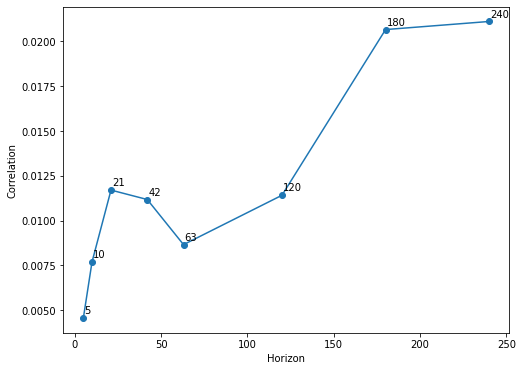

In [80]:
plt.figure(figsize=(8,6))
plt.plot(risk_factor_df[0],risk_factor_df[1], "-o")
plt.xlabel("Horizon")
plt.ylabel("Correlation")
for i, txt in enumerate(risk_factor_df.values):
    plt.annotate(horizon_list[i], (risk_factor_df[0][i]+0.5, risk_factor_df[1][i]+0.00025))
plt.show()

In [67]:
for i, txt in enumerate(risk_factor_df.values):
    print(txt)

[5.00000000e+00 4.56796393e-03]
[1.00000000e+01 7.68737907e-03]
[2.10000000e+01 1.17022526e-02]
[4.2000000e+01 1.1176403e-02]
[6.30000000e+01 8.66016068e-03]
[1.20000000e+02 1.14127937e-02]
[1.80000000e+02 2.06569031e-02]
[2.40000000e+02 2.11089461e-02]


In [207]:
ranks = b - 1/2
ranks

,AAL,AAP,AAPL,ABBV,ABC,ABI,ABKFQ,ABMD,ABS,ABT,...,XOM,XRAY,XRX,XTO,XYL,YRCW,YUM,ZBRA,ZION,ZTS
1996-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-03,311.5,571.5,46.5,242.5,613.5,37.5,196.5,687.5,358.5,411.5,...,818.5,165.5,562.5,56.5,164.5,207.5,468.5,517.5,410.5,825.5
2021-08-04,310.5,570.5,46.5,241.5,612.5,37.5,195.5,687.5,357.5,410.5,...,818.5,165.5,561.5,56.5,164.5,206.5,467.5,516.5,409.5,825.5
2021-08-05,310.5,570.5,46.5,241.5,612.5,37.5,195.5,687.5,357.5,410.5,...,818.5,165.5,561.5,56.5,164.5,206.5,467.5,516.5,409.5,825.5
2021-08-06,310.5,569.5,46.5,241.5,611.5,37.5,195.5,687.5,357.5,410.5,...,817.5,165.5,560.5,56.5,164.5,206.5,467.5,516.5,409.5,825.5


In [208]:
score = ranks.divide(ranks.count(axis=1),axis=0)
predictor = 2 * score -1
predictor

,AAL,AAP,AAPL,ABBV,ABC,ABI,ABKFQ,ABMD,ABS,ABT,...,XOM,XRAY,XRX,XTO,XYL,YRCW,YUM,ZBRA,ZION,ZTS
1996-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-03,-0.267059,0.344706,-0.890588,-0.429412,0.443529,-0.911765,-0.537647,0.617647,-0.156471,-0.031765,...,0.925882,-0.610588,0.323529,-0.867059,-0.612941,-0.511765,0.102353,0.217647,-0.034118,0.942353
2021-08-04,-0.269412,0.342353,-0.890588,-0.431765,0.441176,-0.911765,-0.540000,0.617647,-0.158824,-0.034118,...,0.925882,-0.610588,0.321176,-0.867059,-0.612941,-0.514118,0.100000,0.215294,-0.036471,0.942353
2021-08-05,-0.269412,0.342353,-0.890588,-0.431765,0.441176,-0.911765,-0.540000,0.617647,-0.158824,-0.034118,...,0.925882,-0.610588,0.321176,-0.867059,-0.612941,-0.514118,0.100000,0.215294,-0.036471,0.942353
2021-08-06,-0.269412,0.340000,-0.890588,-0.431765,0.438824,-0.911765,-0.540000,0.617647,-0.158824,-0.034118,...,0.923529,-0.610588,0.318824,-0.867059,-0.612941,-0.514118,0.100000,0.215294,-0.036471,0.942353


In [209]:
returns = rets.iloc[:,rets.columns.isin(b.columns)]

In [245]:
returns = returns.iloc[:,np.abs([x for x in returns.fillna(0).cumsum().ffill().iloc[-1]]) < 500]

In [246]:
strat_returns = (predictor * returns.shift(-1)).sum(axis=1)

In [247]:
pnl = strat_returns.cumsum()

<AxesSubplot:>

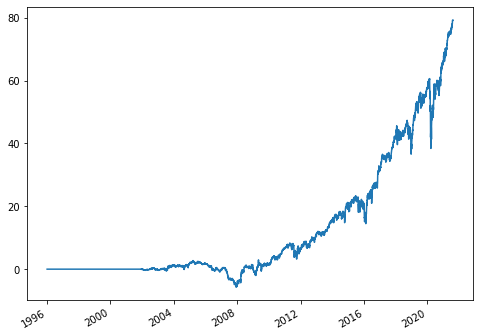

In [248]:
pnl.plot(figsize=(8,6))

/Users/lucaskrenn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/lucaskrenn/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3215: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(-key, value, inplace=True)


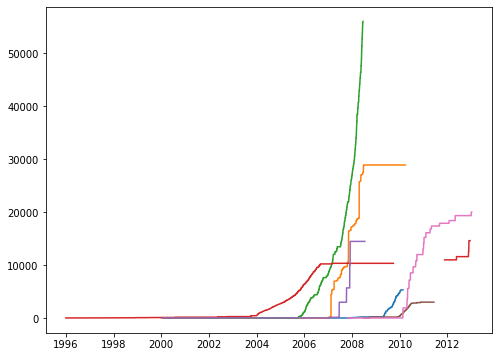

In [244]:
plt.figure(figsize=(8,6))
plt.plot(rets.iloc[:,np.abs([x for x in rets.fillna(0).cumsum().ffill().iloc[-1]]) > 500].cumsum())

In [250]:
bads = rets.iloc[:,np.abs([x for x in rets.fillna(0).cumsum().ffill().iloc[-1]]) > 500]
bads

,ACS,BDK,BSC,CBE,CFC,MEE,TIE
1996-01-02,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
1996-01-03,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
1996-01-04,NaN,NaN,NaN,0.045415,NaN,NaN,NaN
1996-01-05,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
1996-01-08,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2021-08-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [252]:
rets.loc[:,'ACS'].dropna()

2004-04-02    0.000000
2004-04-05    0.000000
2004-04-06   -0.061538
2004-04-07    0.000000
2004-04-08    0.000000
                ...   
2010-02-16   -0.031987
2010-02-17    0.024348
2010-02-18    0.000000
2010-02-19    0.000000
2010-02-22   -0.016129
Name: ACS, Length: 1483, dtype: float64

No wonder,.... https://finance.yahoo.com/quote/ACS/history?period1=1262304000&period2=1269388800&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true

In [253]:
rets.loc[:,'BDK'].dropna()

2000-01-04   -0.011364
2000-01-05   -0.011494
2000-01-06    0.000000
2000-01-07    0.000000
2000-01-10   -0.011628
                ...   
2010-03-25   -0.010858
2010-03-26   -0.003293
2010-03-29   -0.005507
2010-03-30   -0.006644
2010-03-31   -0.003902
Name: BDK, Length: 2578, dtype: float64

https://finance.yahoo.com/quote/BDK/history?period1=1230768000&period2=1269993600&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true

In [254]:
rets.loc[:,'BSC'].dropna()

2000-02-08       0.074304
2000-02-09       0.000000
2000-02-10       0.000000
2000-02-11       0.000000
2000-02-14       0.000000
                 ...     
2008-06-12    1033.084651
2008-06-13      -0.999107
2008-06-16    1159.529226
2008-06-17      -0.022522
2008-06-18       0.061656
Name: BSC, Length: 2105, dtype: float64

https://finance.yahoo.com/quote/BSC/history?period1=1167609600&period2=1230768000&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true

In [255]:
rets.loc[:,'CBE'].dropna()

1996-01-02    0.000000
1996-01-03    0.000000
1996-01-04    0.045415
1996-01-05    0.000000
1996-01-08    0.000000
                ...   
2012-12-11    0.000000
2012-12-12    0.000000
2012-12-13   -0.066667
2012-12-14    0.000000
2012-12-17   -0.071429
Name: CBE, Length: 3730, dtype: float64

https://finance.yahoo.com/quote/CBE/history?period1=1293840000&period2=1356998400&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true

In [256]:
rets.loc[:,'CFC'].dropna()

2000-01-20    0.000000
2000-01-21    0.000000
2000-01-24    0.000000
2000-01-25    0.000000
2000-01-26    0.000000
                ...   
2008-07-14   -0.017391
2008-07-15    0.000000
2008-07-16   -0.017699
2008-07-17    0.000000
2008-07-18   -0.018018
Name: CFC, Length: 2139, dtype: float64

https://finance.yahoo.com/quote/CFC/history?period1=1167609600&period2=1230768000&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true

In [257]:
rets.loc[:,'MEE'].dropna()

2008-06-23    0.039505
2008-06-24    0.214433
2008-06-25    0.037297
2008-06-26   -0.185437
2008-06-27    0.030094
                ...   
2011-06-06    0.000000
2011-06-07   -0.073037
2011-06-08    0.000000
2011-06-09    0.000000
2011-06-10    0.006063
Name: MEE, Length: 749, dtype: float64

https://finance.yahoo.com/quote/MEE/history?period1=1262304000&period2=1325376000&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true

In [258]:
rets.loc[:,'TIE'].dropna()

2007-10-29    0.002785
2007-10-30   -0.040000
2007-10-31    0.018519
2007-11-01   -0.035796
2007-11-02   -0.060401
                ...   
2013-01-04    0.018182
2013-01-07    0.000000
2013-01-08   -0.017857
2013-01-09   -0.045455
2013-01-10    0.028571
Name: TIE, Length: 1310, dtype: float64

https://finance.yahoo.com/quote/TIE/history?period1=1325376000&period2=1388534400&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true

Jan 27, 2012
